#  Statistical Modeling with statsmodels

## Why Use statsmodels?

In many biology and chemistry experiments, we want to go beyond summary statistics — we want to test:

- Is there a **significant difference** between groups?
- Does **concentration** affect a response variable?
- How well does a **dose-response** model fit the data?

This is where **statsmodels** comes in.

It allows you to:

- Fit **linear regression models**  
-  Run **t-tests**, **ANOVA**, and other statistical tests  
-  Generate detailed statistical summaries (like R or GraphPad)

---

## Common Use Cases in Biochemistry:
- Compare treated vs control groups
- Model dose-response relationships
- Analyze linear trends (e.g., protein concentration over time)

---
## Quick Syntax Reference

```python
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Linear regression using formula notation:
model = smf.ols('response ~ variable', data=df).fit()
model.summary()
# ANOVA table:
sm.stats.anova_lm(model, typ=2)


In [7]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

##  Example: Dose-Response Regression

You test a drug at different doses and measure the enzyme inhibition (response).  
Now you want to model the relationship and determine if the dose affects the outcome.

In [8]:
# Simulated experimental data
data = {
    'Dose_mg': [0, 1, 2, 3, 4, 5],
    'Inhibition_percent': [5, 15, 35, 50, 65, 80]
}

df = pd.DataFrame(data)
df

,Dose_mg,Inhibition_percent
0,0,5
1,1,15
2,2,35
3,3,50
4,4,65
5,5,80


## Fit a Linear Regression Model

Let’s fit a line to predict enzyme inhibition (%) based on drug dose (mg).

In [9]:
# Use formula-style syntax: 'response ~ predictor'
model = smf.ols('Inhibition_percent ~ Dose_mg', data=df).fit()

# View model summary
model.summary()

C:\Users\BenHuang\anaconda3\envs\data-book\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Inhibition_percent   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     945.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           6.66e-06
Time:                        23:14:01   Log-Likelihood:                -11.745
No. Observations:                   6   AIC:                             27.49
Df Residuals:                       4   BIC:                             27.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0952      1.519      2.038      0.111      -1.122       7.313
Dose_mg       15.4286      0.502     30.753      0.000      14.036      16.822
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.890
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.397
Skew:                          -1.175   Prob(JB):                        0.497
Kurtosis:                       3.261   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Interpreting the Model Summary

- **coef**: shows the slope and intercept of the regression line  
- **R-squared**: tells us how well the model fits (closer to 1 is better)  
- **P>|t|**: tells us whether the effect of dose is statistically significant (p < 0.05 = significant)

In this case, if the p-value for `Dose_mg` is low, we can conclude that the drug dose significantly affects enzyme inhibition.

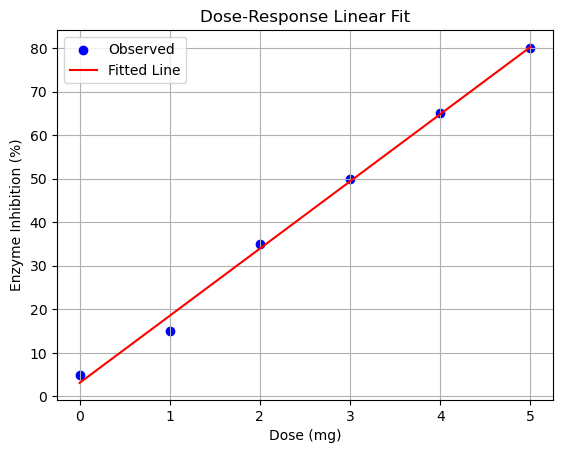

In [10]:
# Plot data and regression line
plt.scatter(df['Dose_mg'], df['Inhibition_percent'], label="Observed", color='blue')
plt.plot(df['Dose_mg'], model.predict(df), label="Fitted Line", color='red')

plt.xlabel("Dose (mg)")
plt.ylabel("Enzyme Inhibition (%)")
plt.title("Dose-Response Linear Fit")
plt.legend()
plt.grid(True)
plt.show()

## ANOVA: Analysis of Variance

ANOVA helps test if dose has a significant effect on response (like a global test).

Here’s how to run it using statsmodels:

In [11]:
# Run ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Dose_mg,4165.714286,1.0,945.72973,0.000007
Residual,17.619048,4.0,NaN,NaN


## Summary

In this chapter, you learned how to:

- Use **statsmodels** to build a linear regression model
- Analyze a **dose-response** relationship
- Interpret statistical output (p-values, R²)
- Perform an optional **ANOVA** to test significance

statsmodels is especially useful when you want R-style statistical analysis in Python — perfect for biology labs, drug testing, or gene expression studies.